In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib.patches import PathPatch
from matplotlib.path import Path

In [12]:
def plot_matrix(m, one_over_root, one_over_p):
  codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
  codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
  vertices = [(0, 0), (0, one_over_root), (one_over_root, one_over_root), (one_over_root, 0), (0, 0)]
  vertices += [(0, 0), (0, one_over_p), (one_over_p, one_over_p), (one_over_p, 0), (0, 0)]
  path = Path(vertices, codes)
  pathpatch = PathPatch(path, facecolor='none', edgecolor='green')
  fig, ax = plt.subplots()
  ax.add_patch(pathpatch)

  def safe_log(x):
    if x == 0:
        return 0
    else:
        return math.log(x)

  safe_log = np.vectorize(safe_log)
  #m = -np.log(m)
  #m = safe_log(m)
  m = np.transpose(m)
  #m = np.flipud(m)
  plt.imshow(m, cmap='hot', interpolation='nearest')
  plt.gca().invert_yaxis()
  plt.colorbar()
  plt.show()

In [13]:
def add(a, b):
    if math.isinf(a) and math.isinf(b):
        return -math.inf
    maxim = max(a, b)
    minim = min(a, b)
    return maxim + math.log(1.0 + math.exp(minim - maxim))



-6.214608098422191


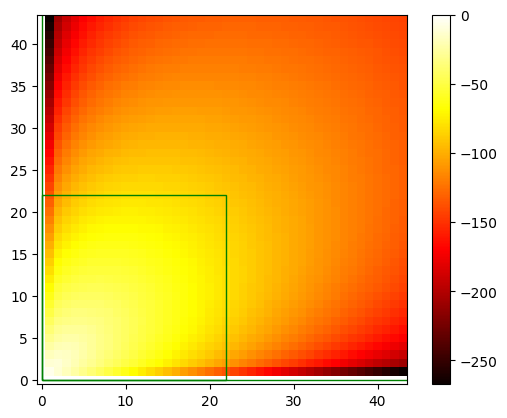

In [47]:
p = 0.002
log_p = math.log(p)
print(log_p)
one_over_p = math.floor(1/p)
one_over_root = math.floor(1/math.sqrt(p))

N = math.floor(2 * one_over_root)

mr = np.zeros((N, N))

# set boundary
for r in range(N):
    mr[1][r] = log_p * r
    mr[r][1] = log_p * r

for a in range(2, N):
    for b in range(2, N):
        log_a = math.log(a)
        log_b = math.log(b)
        log_2 = math.log(2)
        log_4 = math.log(4)
        mr[a][b] = add(
                        add(log_2 + log_a + log_p + mr[a][b-1], log_2 + log_b + log_p + mr[a-1][b]),
                        log_4 + log_p + mr[a-1][b-1]
                      )

plot_matrix(mr, one_over_root, one_over_p)

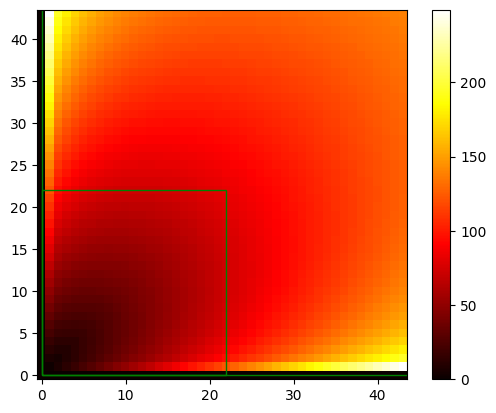

In [49]:
p = 0.002
one_over_p = math.floor(1/p)
one_over_root = math.floor(1/math.sqrt(p))

log_p = math.log(p)

log_p = math.log(p)
log_2 = math.log(2)
log_4 = math.log(4)

N = math.floor(2 * one_over_root)

mg = np.zeros((N, N))

for a in range(1, N):
    for b in range(1, N):
        log_a = math.log(a)
        log_b = math.log(b)
        ma = max(a, b)
        mi = min(a, b)
        log_ma = math.log(ma)
        log_mi = math.log(mi)
        mg[a][b] = (log_4+log_mi+log_p)*add(log_a, log_b) + (log_ma-log_mi)*log_mi

plot_matrix(mg - mr, one_over_root, one_over_p)

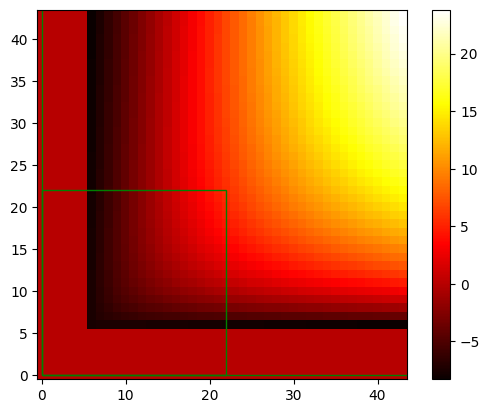

In [43]:
p = 0.002
one_over_p = math.floor(1/p)
one_over_root = math.floor(1/math.sqrt(p))

N = math.floor(2 * one_over_root)

m = np.zeros((N, N))

log_p = math.log(p)
log_2 = math.log(2)
log_4 = math.log(4)

# set boundary
s0 = math.floor(0.3*one_over_root)
log_s0 = math.log(s0)
for r in range(s0, N):
    log_r = math.log(r)
    m[s0][r] = (log_4+log_s0+log_p)*add(log_s0, log_r) + (log_r-log_s0)*log_s0
    m[r][s0] = (log_4+log_s0+log_p)*add(log_s0, log_r) + (log_r-log_s0)*log_s0

for a in range(s0 + 1, N):
    for b in range(s0 + 1, N):
        m[a][b] = add(
                       add(log_2 + log_a + log_p + m[a][b-1], log_2 + log_b + log_p + m[a-1][b]),
                       log_4 + log_p + m[a-1][b-1]
                     )

plot_matrix(m, one_over_root, one_over_p)